

<font color='red' size='5'> Exercise 1: Implement Random Forests Classifier (Zoo Dataset)</font>
1. Importing Required Libraries Let's first load the required libraries.
2. Loading Data: Let's first load the required dataset using pandas read CSV function.
3. Feature Selection: Here, you need to divide given columns into two types of variables
dependent (or target variable) and independent variable (or feature variables).
4. Splitting Data: To understand model performance, dividing the dataset into a training set
and a test set is a good strategy.
• Let's split the dataset by using function train_test_split(). You need to pass 3
parameters features, target, and test_set size.
5. Building Decision Tree Model: Let's create a Decision Tree Model using Scikit-learn.
6. Evaluating Model: Let's estimate, how accurately the classifier or model can predict the
different classes.
7. Accuracy can be computed by comparing actual test set values and predicted values.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
csv_filename="zoo.data"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, 
              names=["Animal", "Hair" , "Feathers" , "Eggs" , "Milk" , "Airborne",
                     "Aquatic" , "Predator" , "Toothed" , "Backbone", "Breathes" , "Venomous",
                     "Fins", "Legs", "Tail", "Domestic", "Catsize", "Type" ])

In [2]:
df

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.head(10)

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [4]:
df.tail(10)

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
92,tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
93,vampire,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
94,vole,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


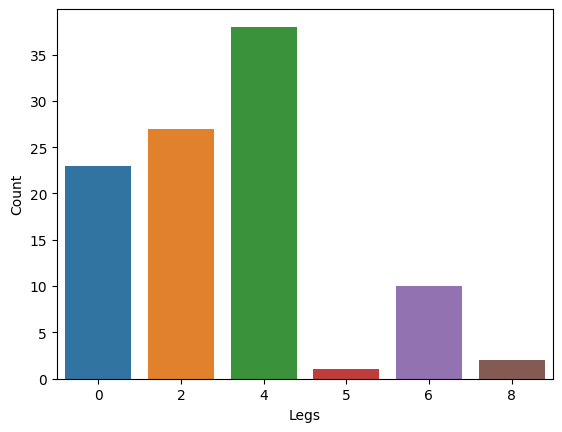

Legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64

In [5]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(x="Legs", data=df)
plt.xlabel("Legs")
plt.ylabel("Count")
plt.show()
df.loc[:,'Legs'].value_counts()



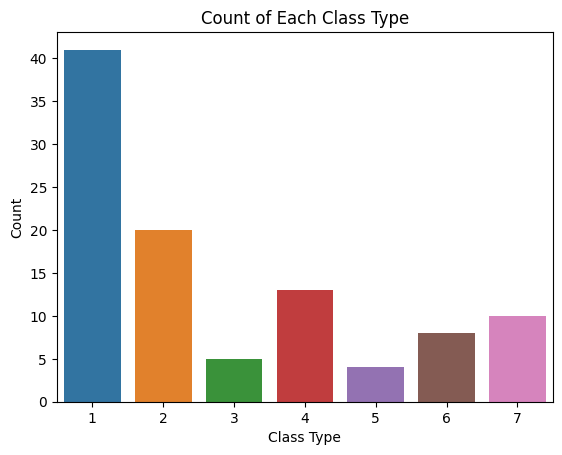

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Type', data=df)
plt.title("Count of Each Class Type")
plt.xlabel("Class Type")
plt.ylabel("Count")
plt.show()

In [7]:
df= df.drop('Animal',axis=1)

In [8]:
df.head()

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Type',axis=1)
Y= df['Type']

In [11]:
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [12]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: Type, Length: 101, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [14]:
len(X_train)

70

In [15]:
len(X_test)

31

In [16]:
X_train

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
57,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
59,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
77,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1


In [17]:
X_test

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
68,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
50,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
93,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
80,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0
33,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
58,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1


In [18]:
y_train

54    1
85    7
99    7
10    1
57    2
     ..
84    1
59    2
77    7
96    1
98    1
Name: Type, Length: 70, dtype: int64

In [19]:
y_test

68    1
92    4
50    1
27    1
55    1
93    1
80    3
33    2
60    4
58    2
41    2
2     4
18    4
64    1
45    1
36    1
66    1
69    1
79    2
88    6
15    7
0     1
46    7
52    5
14    7
89    5
20    2
97    6
16    2
23    2
83    2
Name: Type, dtype: int64

In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train) 
model.score(X_test,y_test)

0.967741935483871

In [48]:
y_pred=model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         4
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.93      0.93      0.90        31
weighted avg       0.98      0.97      0.97        31



In [50]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
from sklearn.cluster import KMeans

In [23]:
model = KMeans(random_state = 42)

In [24]:
model.fit_predict(df)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

array([1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 4, 3, 0, 2, 2, 4, 1, 3, 6, 4, 4,
       1, 4, 2, 5, 5, 7, 1, 7, 2, 1, 7, 4, 3, 1, 1, 4, 3, 2, 2, 4, 2, 4,
       1, 1, 2, 1, 1, 1, 1, 2, 5, 2, 1, 1, 4, 4, 4, 4, 3, 3, 3, 1, 1, 1,
       6, 1, 1, 1, 1, 4, 2, 3, 6, 7, 3, 0, 4, 4, 3, 0, 3, 4, 7, 2, 3, 4,
       2, 5, 5, 5, 3, 7, 1, 4, 7, 2, 1, 0, 4])

In [25]:
#ssd = sum of squared distance
import warnings

# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

ssd = []

K = range(2,6)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df)
    ssd.append(model.inertia_)

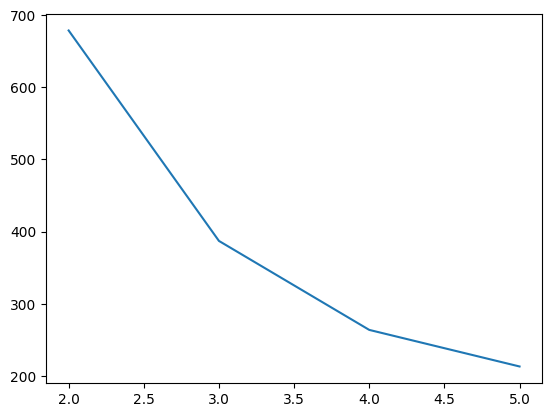

In [26]:
sns.lineplot(x=K, y = ssd)
plt.show()

In [27]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


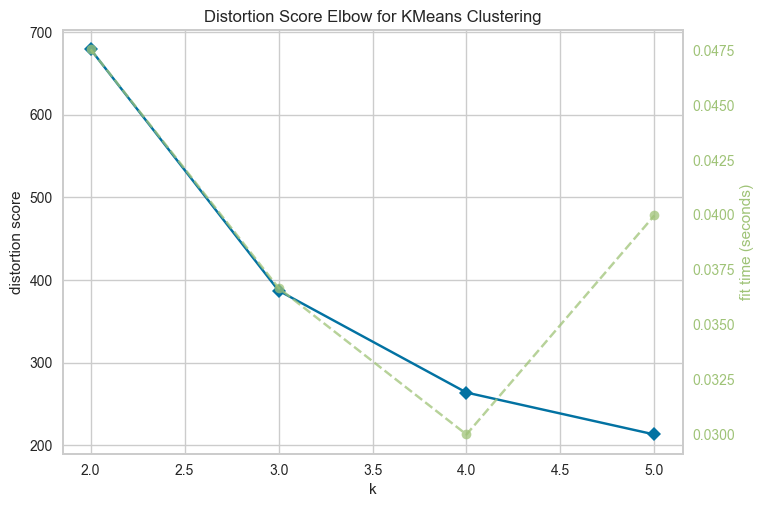

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2, 6))

visualizer.fit(df)

visualizer.poof()


In [30]:
model = KMeans(n_clusters=4)
model.fit(df)

KMeans(n_clusters=4)

In [32]:
df["cluster"] = model.labels_

In [34]:
df["cluster"].value_counts()

cluster
0    40
3    23
1    20
2    18
Name: count, dtype: int64

In [35]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(df, df.cluster)

0.5798977403296984

In [39]:
df[df["cluster"]==0]

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type,cluster
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,0
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0
